In [8]:
!pip3 install opencv_python
!pip3 install numpy
!pip3 install matplotlib
!pip3 install scikit-learn

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [10]:
# There are some problems in notebooks with cv2 imshow, use matplotlib instead.
# conversion needed
def plt_show(img):
	image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

	plt.imshow(image_rgb)
	plt.axis('off')
	plt.show()
 
def plt_show2(img1, img2):
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img1_rgb)
    axes[0].axis('off')

    axes[1].imshow(img2_rgb)
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()


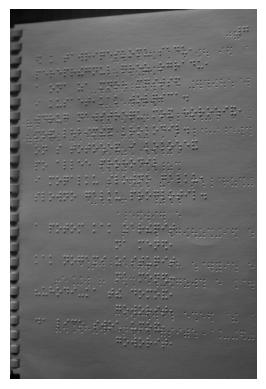

In [11]:
# Cargar imagen
image = cv2.imread("../images/Angelina/0003.jpg", cv2.IMREAD_GRAYSCALE)
plt_show(image)

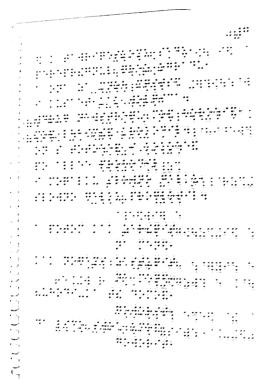

In [12]:
# Preprocesamiento
blurred = cv2.GaussianBlur(image, (7, 7), 5)
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 5, 1.5)
plt_show(binary)


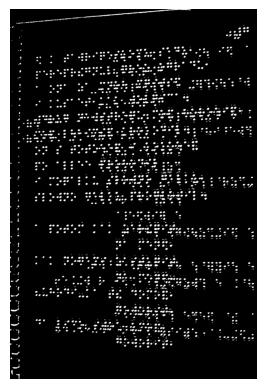

In [13]:
# Transformada morfológica
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
morphed = cv2.erode(binary, kernel, iterations=1)
_, morphed = cv2.threshold(morphed, 127, 255, cv2.THRESH_BINARY_INV)
plt_show(morphed)


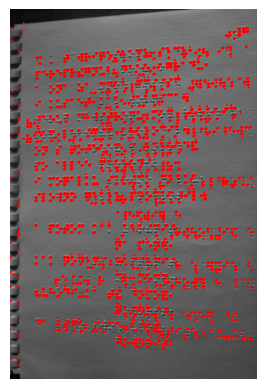

In [14]:
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Create a plot
fig, ax = plt.subplots()

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax.imshow(image_rgb)
ax.axis('off')  # Hide axis

# Define a threshold for circularity
circularity_threshold = 0.7  # Adjust as needed

# Iterate through contours
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    
    if perimeter > 0:  # Avoid division by zero
        circularity = 4 * np.pi * (area / (perimeter ** 2))
        
        # Filter for contours with circularity close to 1 (round)
        if circularity >= circularity_threshold:
            contour = contour.squeeze()  # Remove extra dimensions
            ax.plot(contour[:, 0], contour[:, 1], color='red', linewidth=1)  # Plot contour points

plt.show()